AUTHOR:         
marwa Osman: marwaosman9975@gmail.com    

👉 [LinkedIn](https://www.linkedin.com/in/marwa-osman-00190b222/)

👉 [GitHub](https://github.com/marwa9975)

# SYRIATEL CUSTOMER CHURN PREDICTION

# OVERVIEW   
Based on the data in the dataset, this project employs machine learning methods to create a model that can precisely predict which customers would churn.The 'churn' variable is the target. The predictive model is created using classification methods because the target variable is a categorical variable.



# BUSINESS UNDERSTANDING

## business problem
The business problem is that SyriaTel is losing customers at an alarming rate. In order to reduce churn, the telecommunication  company needs to identify customers who are likely to leave and take steps to prevent them from doing so.   
Customer churn refers to the phenomenon where customers discontinue their services with the company and switch to a competitor or terminate their subscription altogether. Customer churn is a significant concern for telecommunications companies as it can lead to revenue loss and hinder business growth.

The stakeholders in this project are the following:


- Customers: Customers are the primary beneficiaries of this project. By identifying customers who are likely to churn, the company can take steps to prevent them from leaving and improve their customer satisfaction. 
- SyriaTel: SyriaTel is the company that is losing customers. By building a classifier to predict customer churn, the company can take steps to prevent churn and improve its bottom line. 
- other telecommunication companies


# objectives

The objectives of this project are:
- To build a classifier that can accurately predict which customers are likely to churn, 
- Use the classifier to develop strategies for preventing churn.
- Reduce churn and improve SyriaTel's bottom line.



# DATA UNDERSTANDING

The data set used in this project is SyriaTel customer churn dataset.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve,roc_auc_score,log_loss
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score


In [2]:
#Initialize the DataUnderstanding class
class DataUnderstanding:
    def __init__(self, df):
        self.df = df
# Get the summary statistics
    def get_summary_statistics(self):
        summary_stats = self.df.describe()
        return summary_stats
#Get the count of missing values
    def get_missing_values(self):
        missing_values = self.df.isnull().sum()
        return missing_values
#Get the summary of the DataFrame   
    def get_info(self):
        info = self.df.info()
        return info
# Get the data types
    def get_dtypes(self):
        dtypes = self.df.dtypes
        return dtypes  

In [3]:
# load the data and print 
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


The dataset provides information about customer telecommunications data

In [4]:
#Create an instance of DataUnderstanding
du = DataUnderstanding(df)

In [5]:
# Calculate the basic statistical summary
summary_stats = du.get_summary_statistics()
summary_stats


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
# Get info about the dataset
info = du.get_info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

 The columns include:   

``state``: Categorical feature representing the state of the customer.    
``account`` length: Numeric feature representing the number of days the customer has been with the company.    
``area code``: Numeric feature representing the area code of the customer's phone number.   
``phone number``: Categorical feature representing the customer's phone number.     
``international plan``: Categorical feature indicating whether the customer has an international calling plan.    
``voice mail plan``: Categorical feature indicating whether the customer has a voicemail plan.     
``number vmail messages``: Numeric feature representing the number of voicemail messages.    
``total day minutes``: Numeric feature representing the total number of minutes used during the day.    
``total day calls``: Numeric feature representing the total number of calls made during the day.    
``total day charge``: Numeric feature representing the total charge for day calls.    
``total eve minutes``: Numeric feature representing the total number of minutes used during the evening.   
``total eve calls``: Numeric feature representing the total number of calls made during the evening.   
``total eve charge``: Numeric feature representing the total charge for evening calls.    
``total night minutes``: Numeric feature representing the total number of minutes used during the night.    
``total night calls``: Numeric feature representing the total number of calls made during the night.   
``total night charge``: Numeric feature representing the total charge for night calls.   
``total intl minutes``: Numeric feature representing the total number of international minutes used.   
``total intl calls``: Numeric feature representing the total number of international calls made.   
``total intl charge``: Numeric feature representing the total charge for international calls.   
``customer service calls``: Numeric feature representing the number of customer service calls made.   
``churn``: Boolean feature indicating whether the customer has churned or not.   







In [7]:
# Get column data types
dtypes = du.get_dtypes()
dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [8]:
# Those who churned
df['churn'].value_counts()


False    2850
True      483
Name: churn, dtype: int64

There are 3333 records in this dataset, out of which 483 customers are churners and the remaining 2850 are non-churners

# DATA PREPARATION

### Checking for missing values in the dataframe

In [9]:
# checking for missing values
missing_values = du.get_missing_values()
missing_values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There is no missing value in the dataset

### Checking for duplicates
phone number will be used here since it is a unuque identifier

In [10]:
# check for duplicates 
df.duplicated(subset='phone number').sum()


0

No phone number was duplicated

### Dropping unnecessary columns

Column like phone number will not help in the prediction of the customers who are likely to churn.it is just used as a unique identifier

In [11]:
def drop_columns(df, columns, inplace=True):
    if inplace:
        df.drop(columns=columns, inplace=True)
    else:
        return df.drop(columns=columns)

drop_columns(df, 'phone number')


### Detecting and plotting outliers

In [12]:
#function to check for outliers by plotting
def outlier_plot_box(df, column_name, ax=None):
    # plot
    sns.boxplot(x=df[column_name], ax=ax)


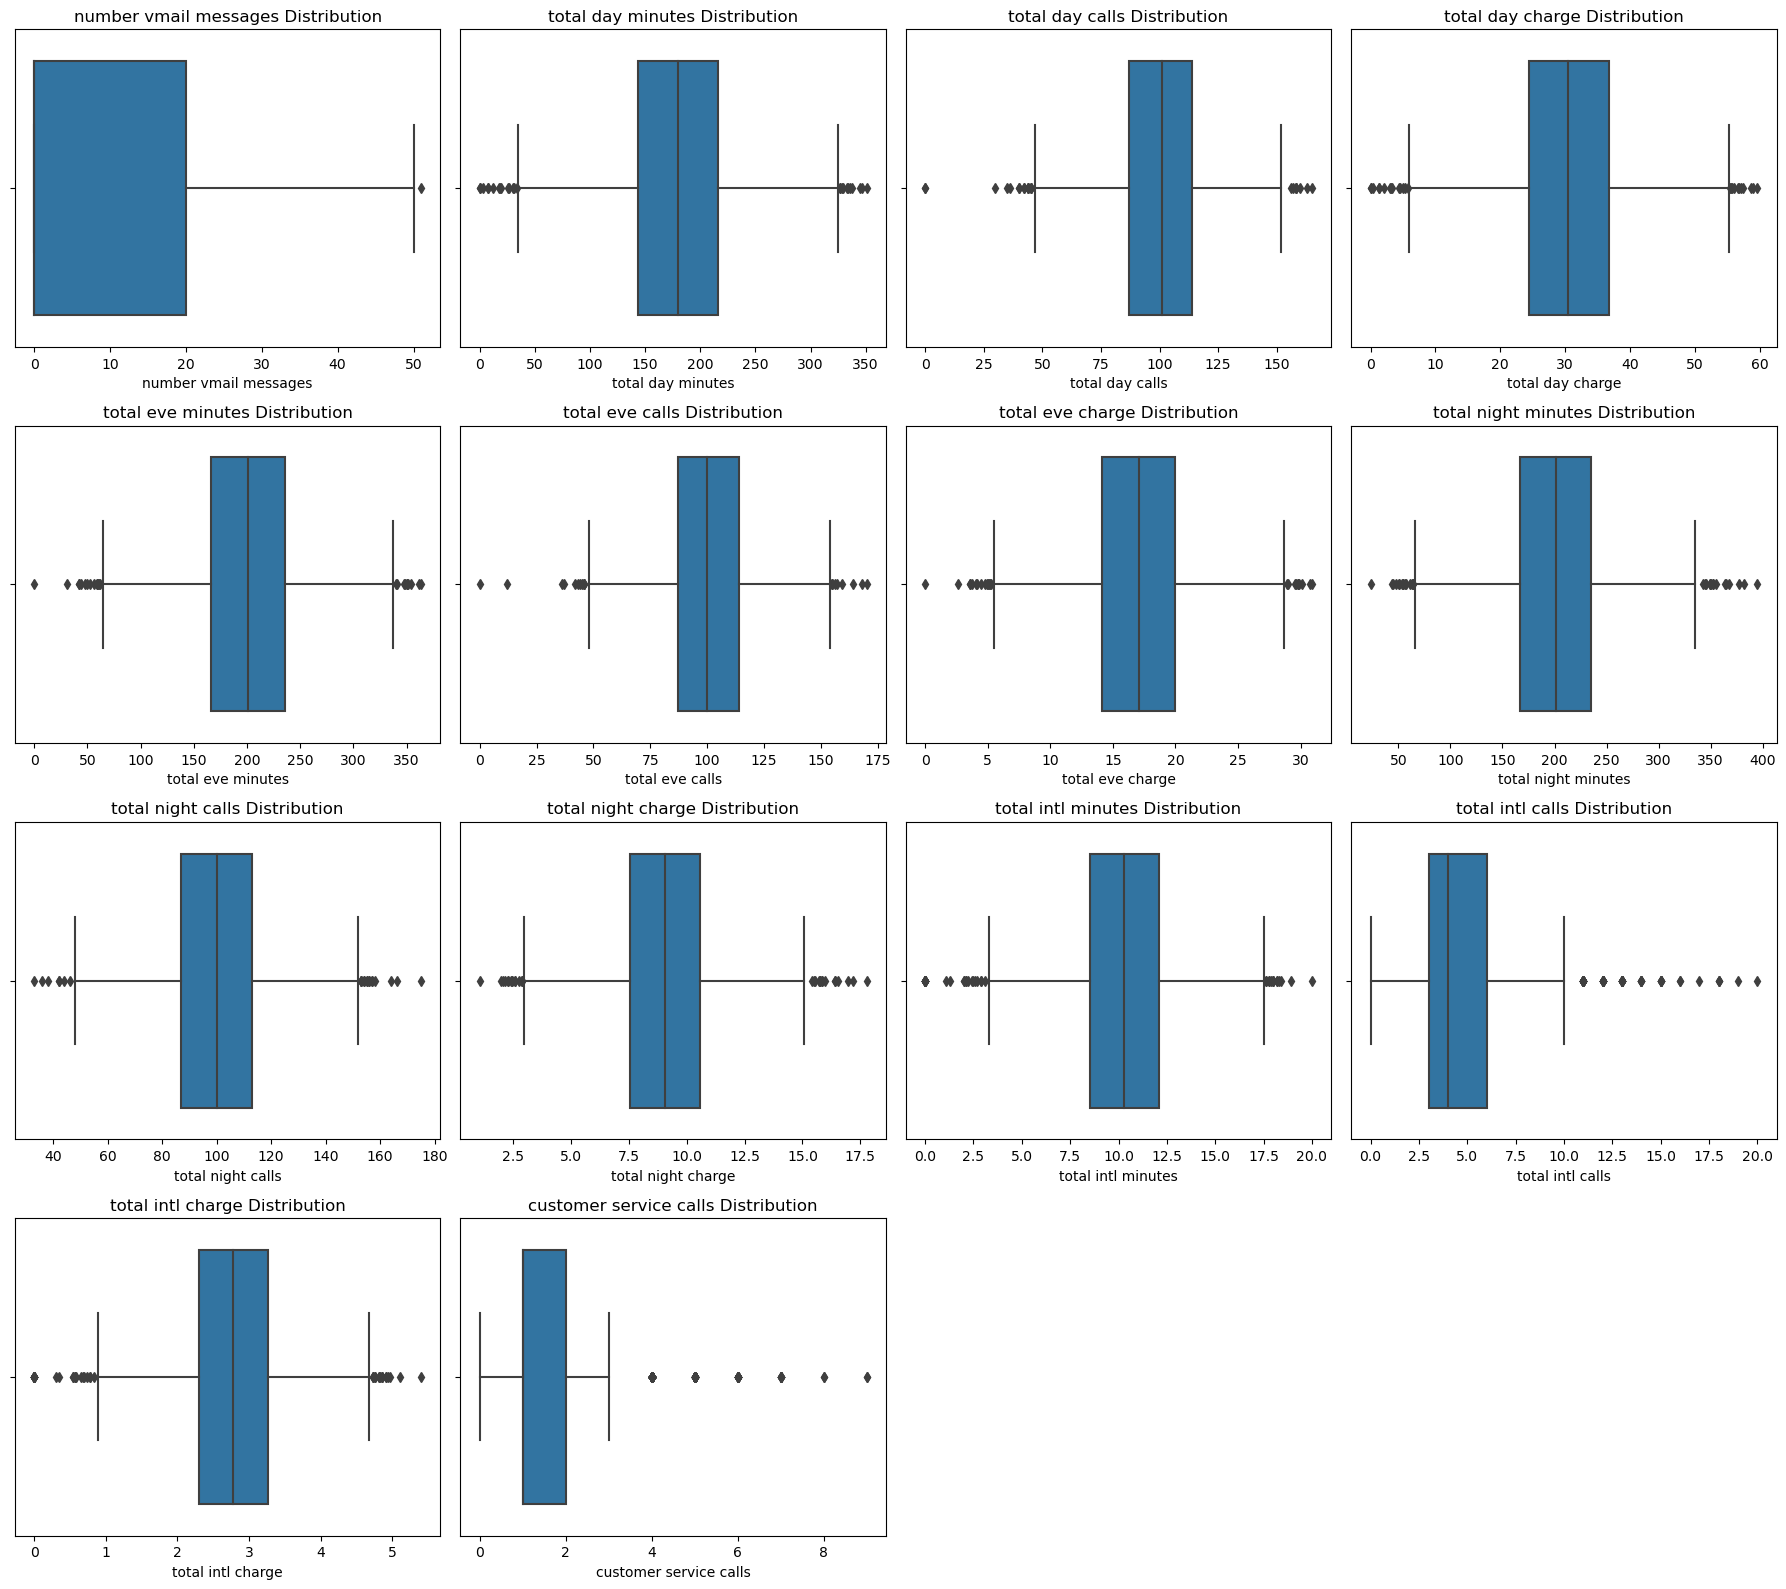

In [13]:
numerical_columns = ['number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
                     'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes',
                     'total night calls', 'total night charge', 'total intl minutes', 'total intl calls',
                     'total intl charge', 'customer service calls']
# function to plot outliers
def plot_all_outliers(df, numerical_columns):

    num_plots = len(numerical_columns)
    num_cols = 4  # Number of columns in the grid

    num_rows = (num_plots + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))

    for i, column in enumerate(numerical_columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row][col]
        outlier_plot_box(df, column, ax=ax)
        ax.set_title(f"{column} Distribution")

    # Remove empty subplots
    if num_plots < num_rows * num_cols:
        for i in range(num_plots, num_rows * num_cols):
            fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

# Call the function to plot all the box plots side by side
plot_all_outliers(df, numerical_columns)

### Removing the outliers

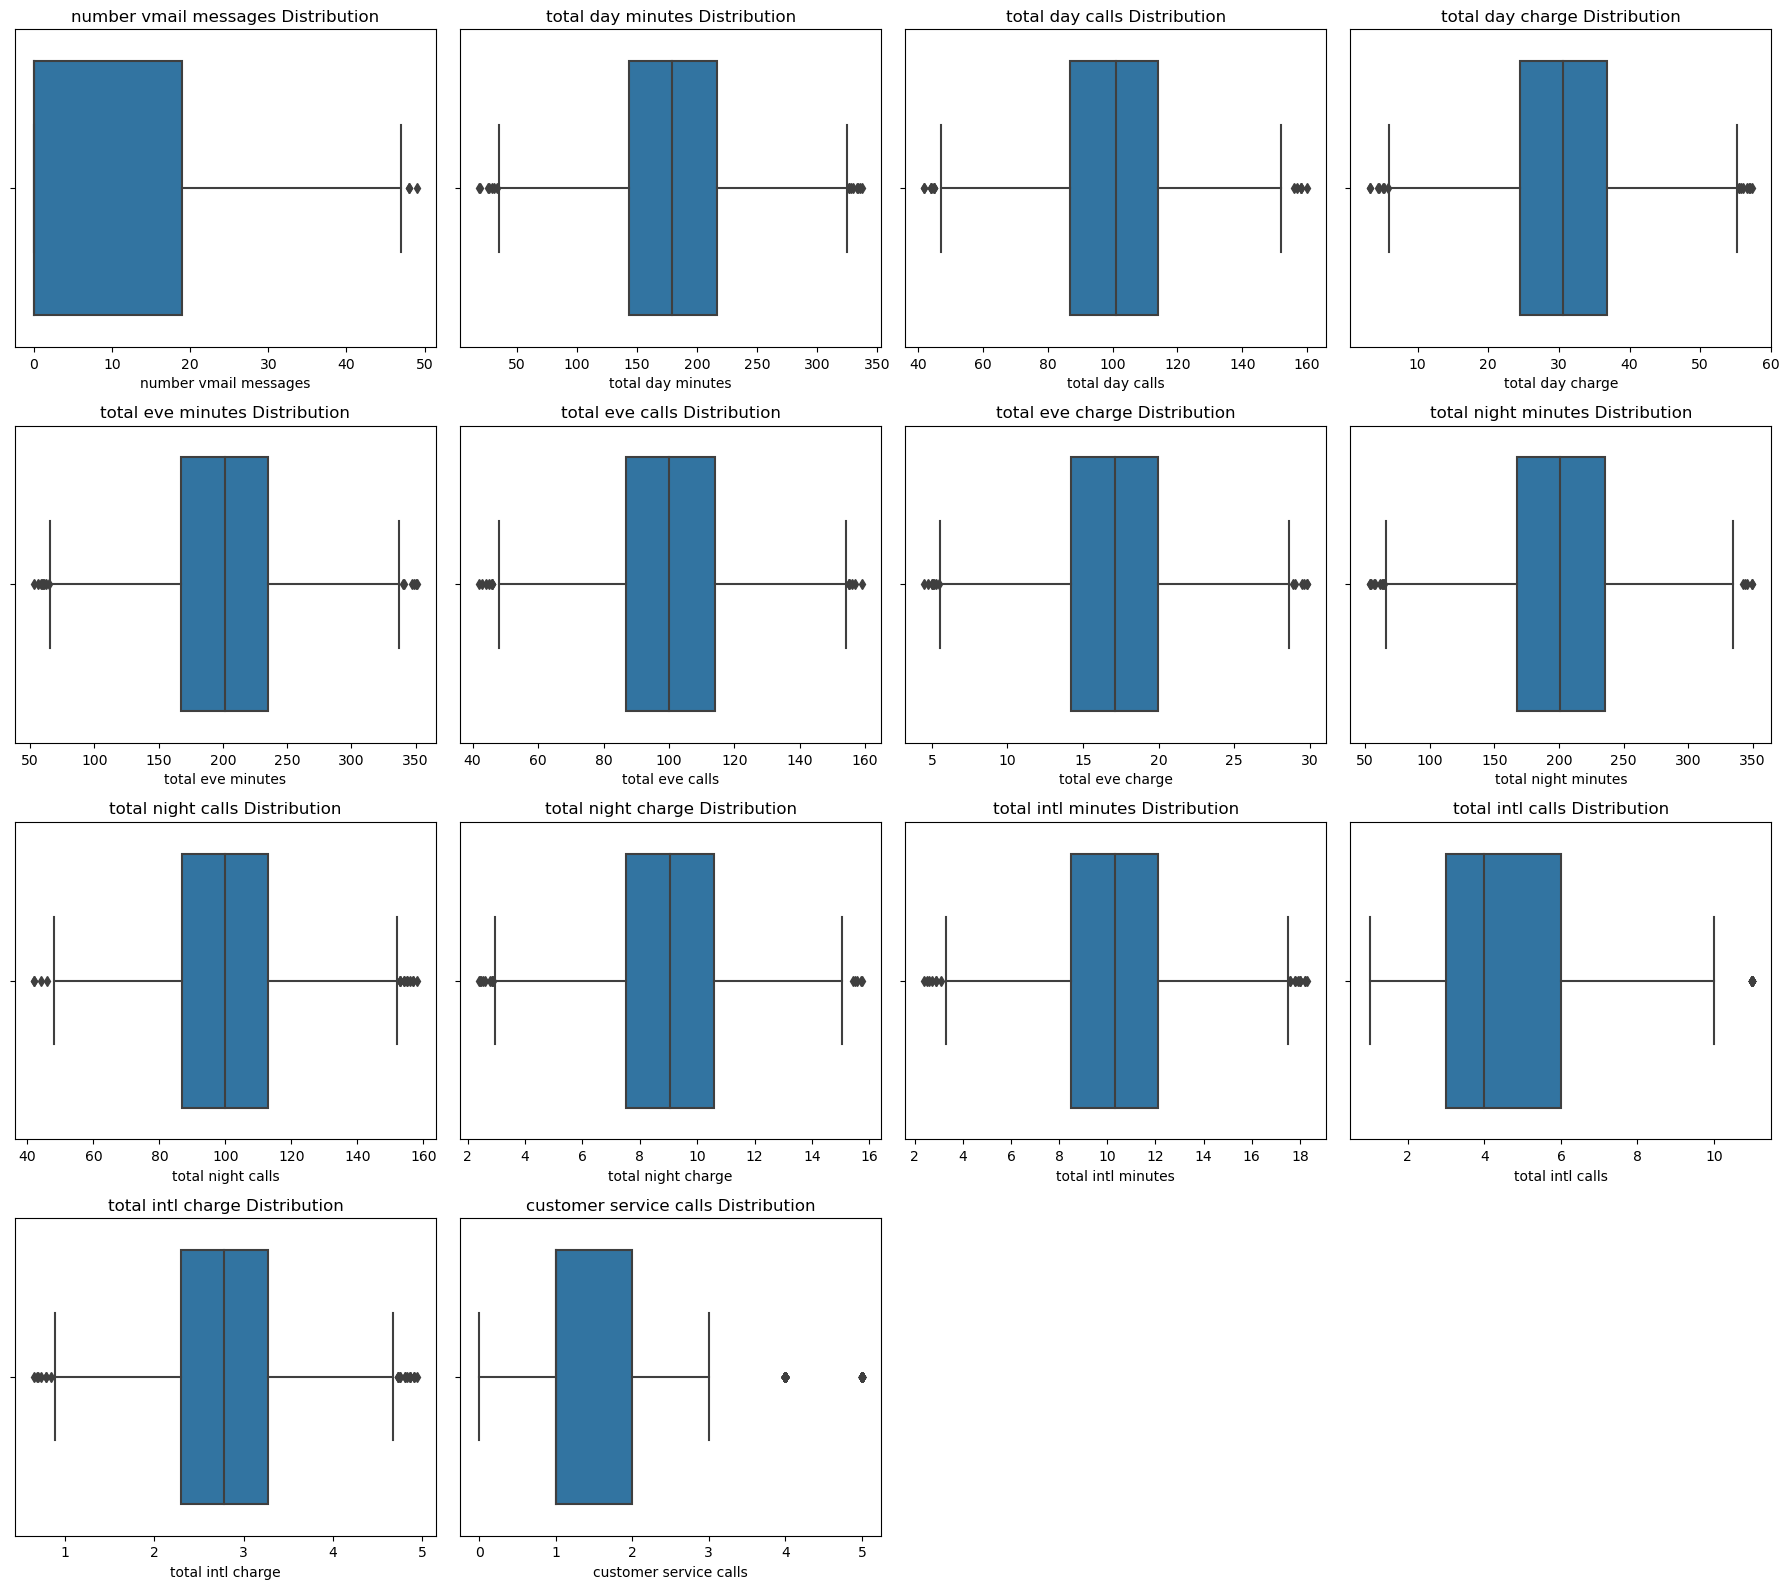

In [14]:
# function to remove outliers
def remove_outliers(data, cols, threshold=3):
    for col in cols:
        z_scores = np.abs(stats.zscore(data[col]))
        data = data[z_scores < threshold]
    return data
# function to plot it
def remove_and_plot_outliers(df, numerical_columns, threshold=3):
    fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, len(numerical_columns) * 6))

    for i, column in enumerate(numerical_columns):
        ax1 = axes[i][0]
        ax2 = axes[i][1]

        # Plot boxplot before removing outliers
        outlier_plot_box(df, column, ax=ax1)
        ax1.set_title(f"{column} Distribution (Before)")

        # Remove outliers
        df_cleaned = remove_outliers(df, [column], threshold=threshold)

        # Plot boxplot after removing outliers
        outlier_plot_box(df_cleaned, column, ax=ax2)
        ax2.set_title(f"{column} Distribution (After)")

    plt.tight_layout()
    plt.show()
# Call the function to remove outliers and plot the box plots after their removal
df = remove_outliers(df, numerical_columns)
plot_all_outliers(df, numerical_columns)

# EXPLORATORY DATA ANALYSIS

In this section I will be exploring the relationship between various between various features.Each column in the dataset will be explored in order to gain a meaningful insights from it.   
The features to be explored will: 
- Categorical columns 

In [15]:
#categorical columns
categorical_columns = ['state','international plan', 'voice mail plan', 'area code']

- Numerical columns

In [16]:
numerical_columns = df.select_dtypes(include='int64').drop('area code', axis=1).columns
numerical_columns


Index(['account length', 'number vmail messages', 'total day calls',
       'total eve calls', 'total night calls', 'total intl calls',
       'customer service calls'],
      dtype='object')

### UNIVERIATE ANALYSIS 

This is analysis of one attribute

The dependent variable is the 'Churn' column, which represents whether a customer is likely to churn or not. It is the variable we want to predict. The independent variable(s) are the predictors used to predict the dependent variable

In [17]:
# count of churn rate
df['churn'].value_counts(normalize=True)

False    0.859899
True     0.140101
Name: churn, dtype: float64

The distribution of the two classes in the data set is not equal. This causes data imbalance. Data imbalance can cause a model to make false predictions, so it is important to address this issue before modeling.

##### plotting churn rate

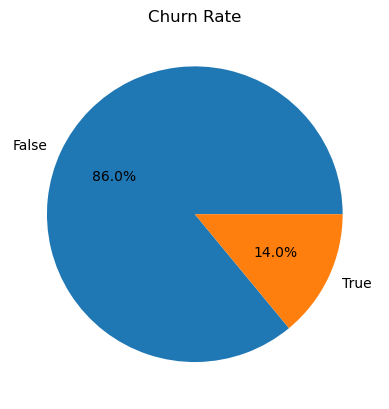

In [18]:
#plotting churn rate
def plot_churn_rate(data):
    #Create a figure
    fig, ax = plt.subplots()

    # Plot the churn rate
    ax.pie(df['churn'].value_counts(), labels=df['churn'].value_counts().index, autopct='%1.1f%%')

    # Add a title
    ax.set_title('Churn Rate')

    # Show the plot
    plt.show()
plot_churn_rate(df['churn'])    

The pie chart shows that the majority of customers (86%) did not churn, while a small minority of customers (14%) did churn.

### Bivariate Analysis

I will analyze the relationship between two attributes

##### Analysis of total day minutes' vs 'total day charge'

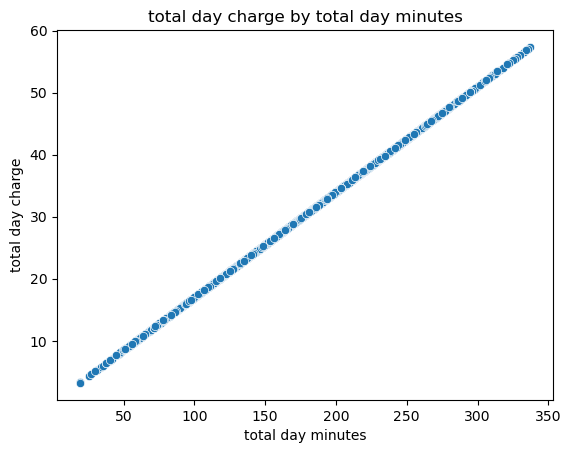

In [19]:
# Create a scatter plot of 'total day minutes' vs 'total day charge'
sns.scatterplot(x='total day minutes', y='total day charge', data=df)
#set title
plt.title('total day charge by total day minutes')

# Show the plot
plt.show()

The relationship between the total day minutes and total day charges are linear.This indicates that as the minutes increase the charges increase linearly with it and vice versa.
This generaly makes sense as the charges corresponds with the time spent on the calls

##### Analysis of Area code by churn

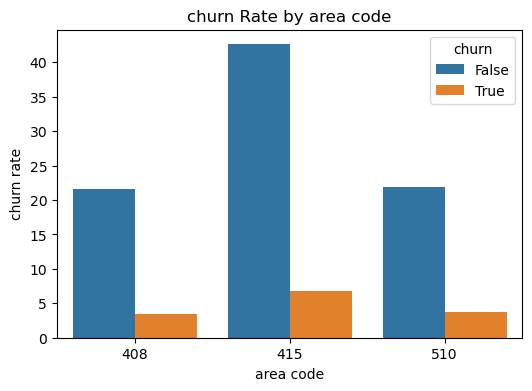

In [20]:
#analysis of Area code by churn
def plot(data, x, y):
    # Plot the figure
    plt.figure(figsize=(6, 4))
    # Plot the bar
    sns.barplot(data=data, x=x, y=y, hue='churn', estimator=lambda x: len(x) / len(data) * 100)
    # Label the axes
    plt.xlabel(x)
    plt.ylabel(f'{y} rate')
    plt.title(f'{y} Rate by {x}')
    # Show the plot
    plt.show()

# Display the plot
plot(df, 'area code', 'churn') 

From the analysis, we can conclude that area code 415 has a higher churn rate compared to area codes 408 and 510. This is partly influenced by the fact that area code 415 has the highest number of customers, which contributes to a higher churn rate. However, when considering the average churn rate across all area codes, the differences are relatively even

##### Relationship of Churn with state

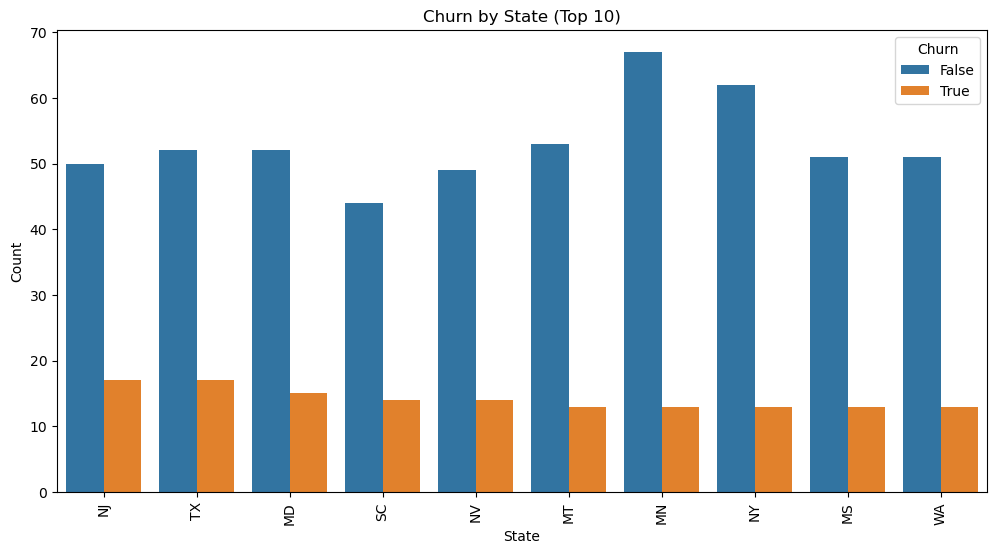

In [21]:
# Bar plot of churn by state
def plot_churn_by_state(data, top_n=10):
    plt.figure(figsize=(12, 6))
    top_states = data[data['churn'] == True]['state'].value_counts().head(top_n).index
    sns.countplot(data=data, x='state', hue='churn', order=top_states)
    plt.xlabel('State')
    plt.ylabel('Count')
    plt.title('Churn by State (Top {})'.format(top_n))
    plt.xticks(rotation=90)
    plt.legend(title='Churn', loc='upper right')
    plt.show()

plot_churn_by_state(df)

Above shows top 10 states where customers are likely to churn.NJ state taking the lead in the churn rate.

##### Relationship of Total evening charge by churn

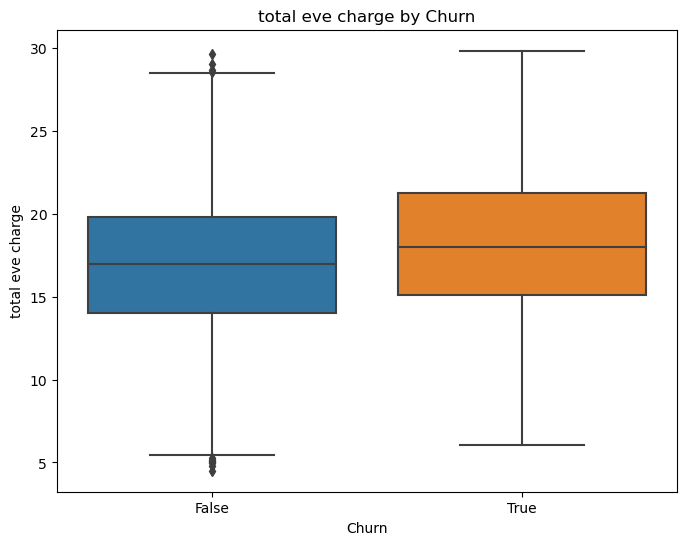

In [22]:
# Box plot of Total evening charge by churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='churn', y='total eve charge')
plt.xlabel('Churn')
plt.ylabel('total eve charge')
plt.title('total eve charge by Churn')
plt.show()

From above the churn rate of customers is high as the total charges for the evening calls increases.This shows that customers tend to churn due to the unsatisfactory charges for the evening calls.

##### Relationship of customer service calls with churn

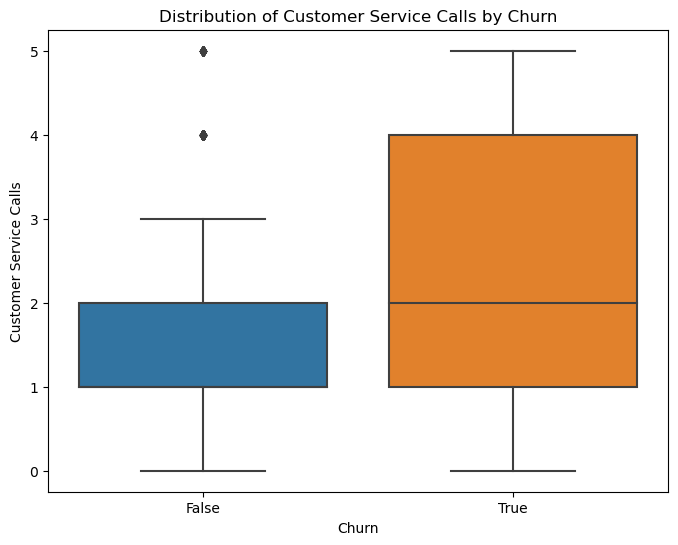

In [23]:
# Box plot of customer service calls by churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='churn', y='customer service calls')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.title('Distribution of Customer Service Calls by Churn')
plt.show()



The customers who have made customer service call are more likely to terminate their account.Churn rate of people who nade the customer service call is high compared to those who remained after making the call.The customer might be unsatisfied with how they were dealt with or the service was simply unsatisfactory

##### Analysis of international plan by churn

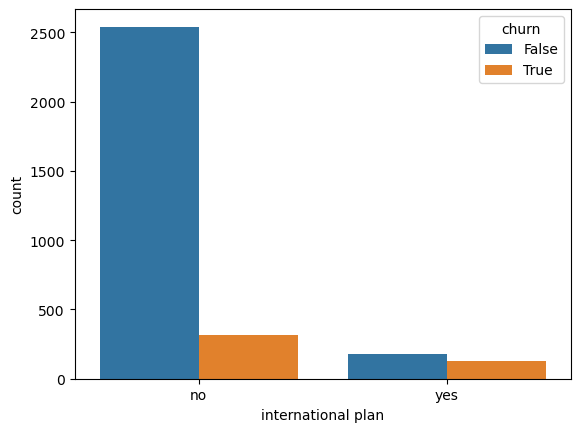

In [24]:
#plot
df['international plan'].value_counts()
sns.countplot(data=df, x='international plan', hue='churn');

Customers with International plan have a lower churn rate compared to those without international plan.Having International plan seems to be a way to retain customers 

#### churn rate by voice mail plan

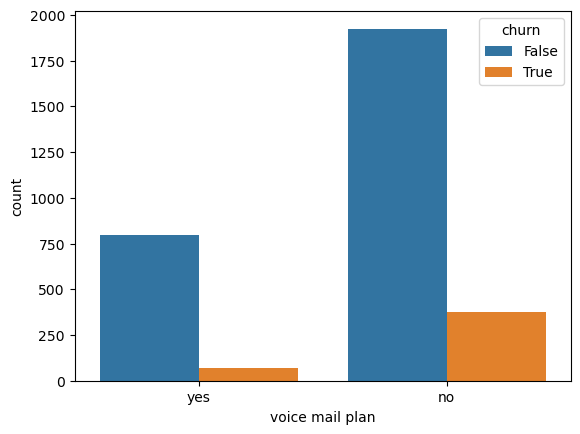

In [25]:
# plot
sns.countplot(x='voice mail plan', hue='churn', data=df)
plt.show()

From above the Customers with Voice Mail plan are less likely to churn compared to those who did not register for the plan.This could be a great Customer retention strategy where customers are encouraged to register for the plan

### Multivariate Analysis

correlation heatmap for numeric columns

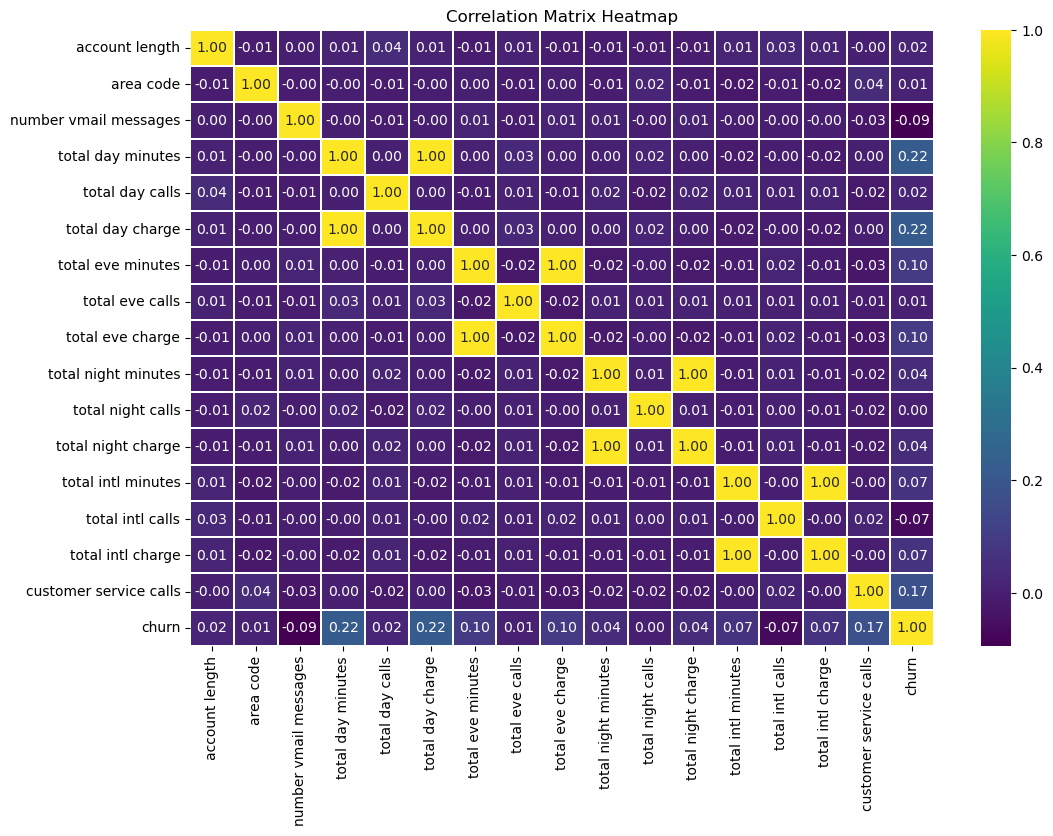

In [26]:

# Correlation heatmap
def plot_correlation_heatmap(dataframe):
    # Compute the correlation matrix
    correlation_matrix = dataframe.corr()

    # Set the figure size
    plt.figure(figsize=(12, 8))

    # Create the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.3)

    # Add a title to the heatmap
    plt.title('Correlation Matrix Heatmap')

    # Display the heatmap
    plt.show()

plot_correlation_heatmap(df)

some features are highly correlated with a perfect correlation of 1.These features are linear as the cost of charges is directly proportional to the usage that is minutes for this case.
these features are:
- Total int charge and total int minutes
- Total night charge and total night minutes
- Total eve charge and total eve minutes
- Total day charge and total day minutes  

These indicate multicollinearity

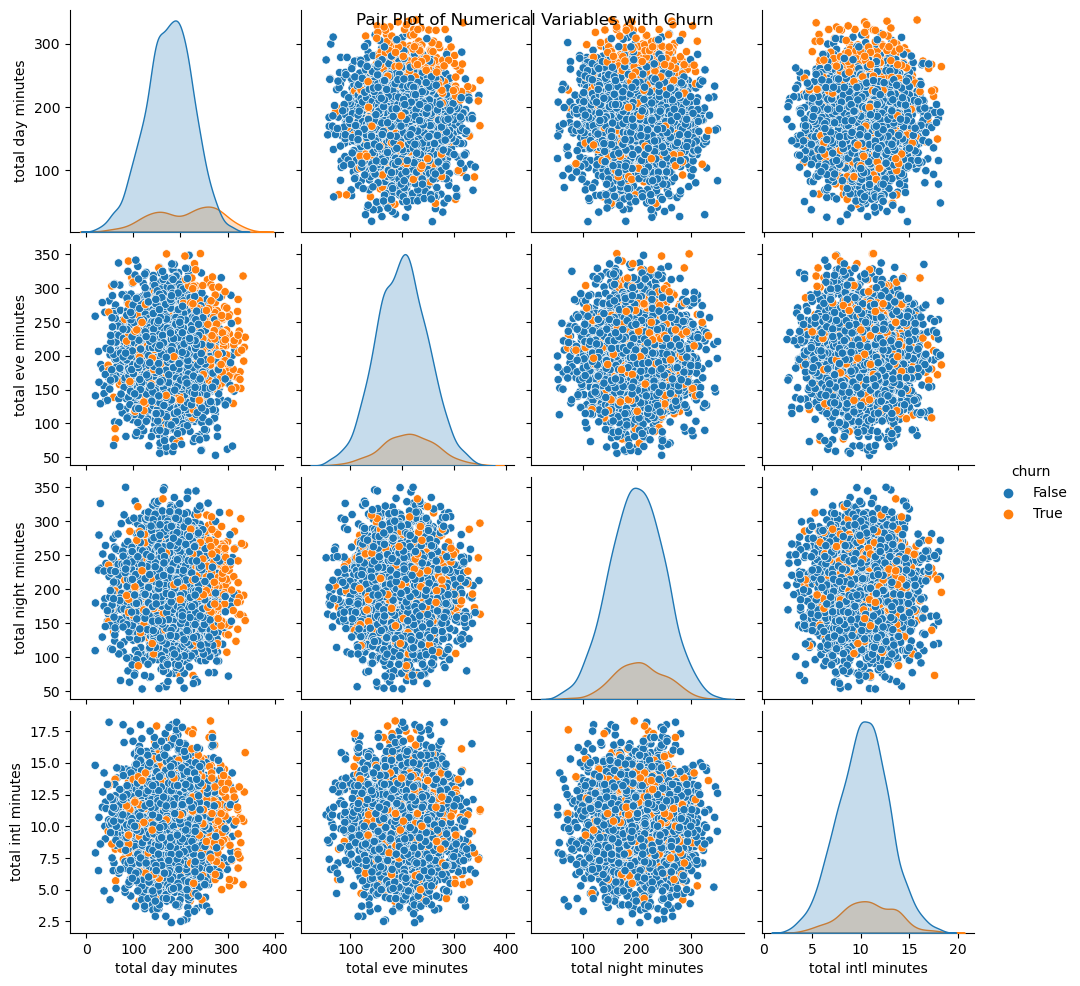

In [27]:
# Pair plot of selected numerical variables
def create_pair_plot(data, num_vars):
    # Create a copy of the data with selected numerical variables and churn
    plot_data = data[num_vars + ['churn']]
    
    # Create the pair plot
    sns.pairplot(plot_data, hue='churn')
    
    # Add a title to the pair plot
    plt.suptitle('Pair Plot of Numerical Variables with Churn')
    
    # Display the pair plot
    plt.show()
create_pair_plot(df, ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'])
 

The scatter plots shows the relationship between the features and the distribution of churn

# DATA PREPROCESSING

### Dropping highly correlated features

In [28]:

def drop_multicollinearity(df, threshold=0.9):

    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Create a mask to identify highly correlated features
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Find the highly correlated features
    highly_correlated = corr_matrix.mask(mask).stack().sort_values(ascending=False)

    # Identify variables with correlation above the threshold
    correlated_vars = highly_correlated[highly_correlated > threshold].index.get_level_values(0)

    # Drop the highly correlated variables from the DataFrame
    df_dropped = df.drop(columns=correlated_vars)

    return df_dropped
df = drop_multicollinearity(df)
print("The reduced dataframe has {} columns.".format(df.shape[1]))

The reduced dataframe has 16 columns.


### Transform churn into 0s and 1s

The churn feature need to be binary encoded to be used in the classification problem

In [29]:
# values in churn before transforming
df['churn'].unique()

array([False,  True])

In [30]:
# Convert the "churn" feature into numeric representation using factorize()
df['churn'] = pd.factorize(df['churn'])[0]


In [31]:
# display the values in churn
df['churn'].unique()

array([0, 1], dtype=int64)

### Assign the variables

assigning y/ target variable to churn feature for prediction and the rest of the features to independent variable X

In [32]:
# Assign the data to X and y
y = df['churn']
X = df.drop(columns=['churn'], axis=1)

In [33]:
X.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3


### One-hot encode the categorical features

One-hot encoding converts categorical variables into binary vectors, where each category becomes a separate binary feature.This is necessary step in order to build a classification model

In [34]:
# Onehotencode
ohe = OneHotEncoder(sparse=False)
X_categorical_encoded = ohe.fit_transform(X[categorical_columns])
# Retrieve feature names for the encoded columns
feature_names = []
for i, col in enumerate(categorical_columns):
    categories = ohe.categories_[i]
    for category in categories:
        feature_names.append(f"{col}_{category}")
# Create a DataFrame for the encoded features
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=feature_names)
X_categorical_encoded_df

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes,area code_408,area code_415,area code_510
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3160,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


### Scaling the numerical features

scaling will enable the numerical fetures to be in the ame range.  
scaling is recommended before applying SMOTE because it ensures that the synthetic samples generated by SMOTE are within the same scaled range as the original samples. This helps maintain consistency and avoids introducing unnecessary bias in the data

I will used standardScaler from scikit-learn

In [35]:
# Select the numerical columns to be scaled
numerical_cols = numerical_columns

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the numerical features
X_numeric_scaled = scaler.fit_transform(X[numerical_cols])
# Create a DataFrame for the scaled features
X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled, columns=numerical_cols)
X_numeric_scaled_df

,account length,number vmail messages,total day calls,total eve calls,total night calls,total intl calls,customer service calls
0,0.674455,1.252649,0.474149,-0.059189,-0.466938,-0.633164,-0.421827
1,0.147918,1.326234,1.132318,0.144739,0.151754,-0.633164,-0.421827
2,0.900114,-0.586984,0.676663,0.501612,0.203312,0.295437,-1.244155
3,-0.428766,-0.586984,-1.500359,-0.619989,-0.570053,1.224038,0.400501
4,-0.654425,-0.586984,0.626034,1.113393,1.079793,-0.633164,1.222830
...,...,...,...,...,...,...,...
3157,2.279139,2.062088,-1.196588,1.317321,-0.879399,0.759738,0.400501
3158,-0.829937,-0.586984,-2.209157,-2.302389,1.182908,-0.168863,1.222830
3159,-1.832865,-0.586984,0.423521,-2.149444,-0.466938,0.759738,0.400501
3160,2.078554,-0.586984,0.221007,-0.823916,1.904716,2.616940,0.400501


In [36]:
# combine the scaled columns and onehotencoded columns
X_encoded_scaled = pd.concat([X_numeric_scaled_df, X_categorical_encoded_df, ], axis=1)
X_encoded_scaled


,account length,number vmail messages,total day calls,total eve calls,total night calls,total intl calls,customer service calls,state_AK,state_AL,state_AR,...,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes,area code_408,area code_415,area code_510
0,0.674455,1.252649,0.474149,-0.059189,-0.466938,-0.633164,-0.421827,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.147918,1.326234,1.132318,0.144739,0.151754,-0.633164,-0.421827,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.900114,-0.586984,0.676663,0.501612,0.203312,0.295437,-1.244155,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.428766,-0.586984,-1.500359,-0.619989,-0.570053,1.224038,0.400501,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,-0.654425,-0.586984,0.626034,1.113393,1.079793,-0.633164,1.222830,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,2.279139,2.062088,-1.196588,1.317321,-0.879399,0.759738,0.400501,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3158,-0.829937,-0.586984,-2.209157,-2.302389,1.182908,-0.168863,1.222830,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3159,-1.832865,-0.586984,0.423521,-2.149444,-0.466938,0.759738,0.400501,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3160,2.078554,-0.586984,0.221007,-0.823916,1.904716,2.616940,0.400501,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


### Train-Test Split

The train-test split is crucial for assessing model performance, preventing overfitting, tuning hyperparameters, refining features, and avoiding data leakage. It helps ensure that our models generalize well to new, unseen data and can make accurate predictions in real-world scenarios.

I will split the data in 80% training and 20% testing data

In [37]:
# Perform train test split using sci kit learn train_test_split
X_train , X_test, y_train, y_test = train_test_split(X_encoded_scaled, y, test_size =0.2, random_state=123)

### SMOTE 

In [38]:
y.value_counts()

0    2719
1     443
Name: churn, dtype: int64

SMOTE (Synthetic Minority Over-sampling Technique) s specifically designed to handle the imbalanced distribution of the target variable, where the minority class has significantly fewer samples compared to the majority class.  

I will use smote to resolve the imbalance in the target variable above where 1 has very few samples compared to 0.

In [39]:
#instantiate SMOTE 
sm = SMOTE(k_neighbors=5, random_state=123)
# fit sm on the training data
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
# print training data set before over sampling
print('Before resampling, the shape of X_train: {}'.format(X_train.shape))
print('Before resampling, the shape of y_train: {}'.format(y_train.shape)) 
# print training data set after over sampling
print('After resampling, the shape of X_train_resampled: {}'.format(X_train_resampled.shape))
print('After resampling, the shape of y_train_resampled: {}'.format(y_train_resampled.shape))
y_train_resampled.value_counts()

Before resampling, the shape of X_train: (2529, 65)
Before resampling, the shape of y_train: (2529,)
After resampling, the shape of X_train_resampled: (4376, 65)
After resampling, the shape of y_train_resampled: (4376,)


0    2188
1    2188
Name: churn, dtype: int64

The dataset is balanced. we can visualize to check this

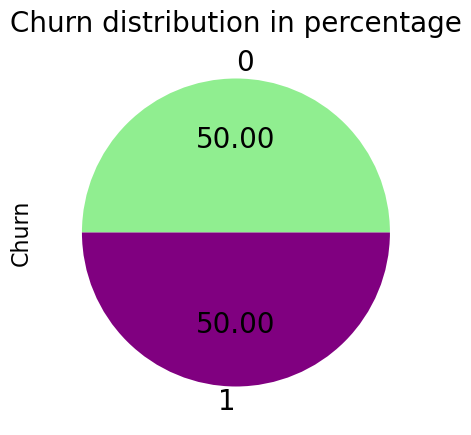

In [40]:
# pie chart showing distribution of target variable
fig, ax = plt.subplots(figsize=(10, 5))
#plot pie chart
y_train_resampled.value_counts().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20}, colors=['lightgreen', 'purple'], ax=ax)
# plot labels
ax.set_ylabel('Churn', fontsize=16)
ax.set_title('Churn distribution in percentage', fontsize=20);

The Training data is now balanced

# MODELING

### Baseline Model - Logistic Regression 

Logistic Regression is a used classification algorithm in machine learning. It is suitable for binary classification tasks where the target variable has two classes.The target variable , churn , has two classes hence making Logistic regression model to be an ideal model to predict the target variable class.

This model will be the baseline model to be compared to other models

In [41]:
# create the logistic Regression model
# use LogisticRegression from scikit learn
# Instantiate the model
logreg = LogisticRegression(solver='liblinear')

# Fit the model
# train the model on training data
logreg.fit(X_train_resampled, y_train_resampled)

# predict the test
y_test_pred = logreg.predict(X_test)
# Assuming you have a trained model called 'model' and test data 'X_test'
y_train_pred = logreg.predict(X_train_resampled)

##### Most important features

In [42]:
def plot_top_feature_importance(feature_importance, feature_names, top_n=10, model_name=None):
    # Sort feature importances and select the top N
    sorted_idx = np.argsort(feature_importance)[::-1][:top_n]
    pos = np.arange(sorted_idx.shape[0]) + 0.5

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(9, 6))

    # Create a horizontal bar chart
    ax.barh(pos, feature_importance[sorted_idx], align='center')
    ax.set_title(f"Top {top_n} Relative Feature Importance for {model_name}", fontsize=13, fontweight='bold')
    ax.set_yticks(pos)
    ax.set_yticklabels(np.array(feature_names)[sorted_idx], fontsize=12)

    # Adjust layout and display the chart
    plt.tight_layout()
    plt.show()


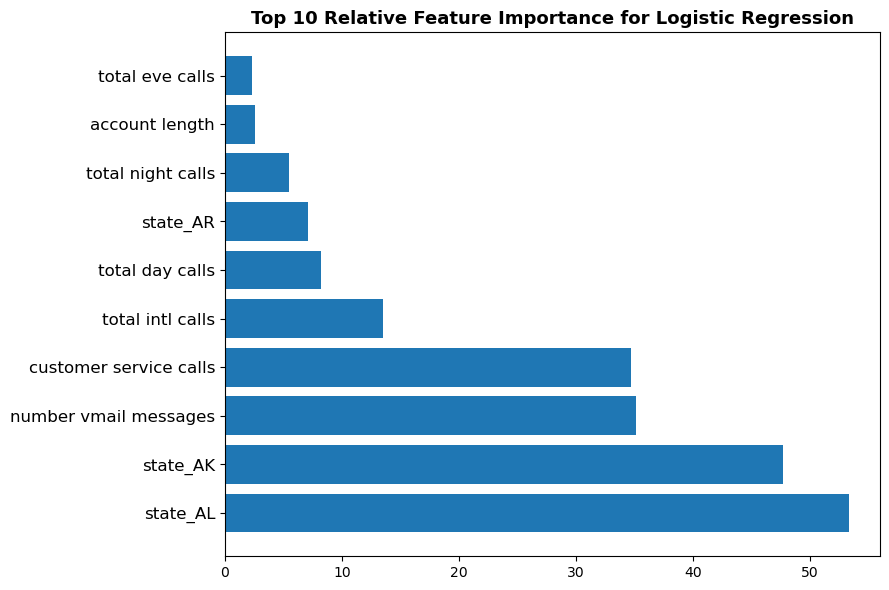

In [43]:
# Calculate the feature importances
feature_importance = abs(logreg.coef_[0])  
 # Select top 10 features
feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10] 
# Get the names of the features
feature_names = X_encoded_scaled.columns.tolist()
# plot
plot_top_feature_importance(feature_importance, feature_names, top_n=10, model_name='Logistic Regression')


Features that hadmost significant impact on the target variable in the above model
- State_AL
- State_AK
- number of vmail messages

#### Baseline Model Evaluation

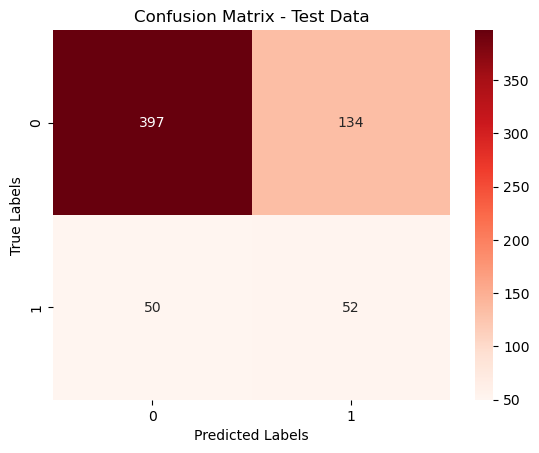

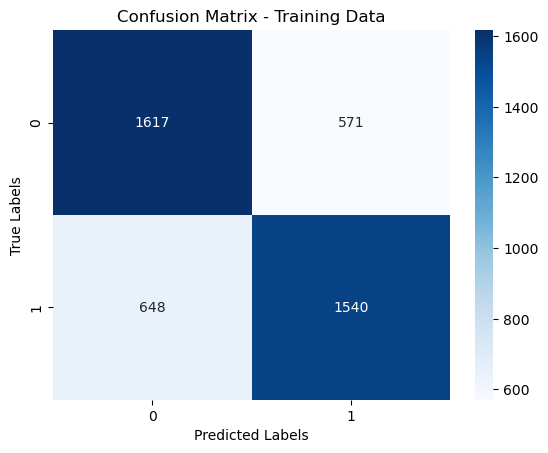

Training Data:
Accuracy: 0.7214351005484461
Precision: 0.7295120795831359
Recall: 0.7038391224862889
F1-score: 0.7164456850430332

Test Data:
Accuracy: 0.7093206951026856
Precision: 0.27956989247311825
Recall: 0.5098039215686274
F1-score: 0.36111111111111105


In [44]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predict the labels for the training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the evaluation metrics for training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_cm = confusion_matrix(y_train, y_train_pred)

    # Calculate the evaluation metrics for test data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)

    # Plot the confusion matrix for test data
    sns.heatmap(test_cm, annot=True, fmt="d", cmap="Reds")
    plt.title("Confusion Matrix - Test Data")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # Plot the confusion matrix for training data
    sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix - Training Data")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # Print the evaluation metrics for training data
    print("Training Data:")
    print("Accuracy:", train_accuracy)
    print("Precision:", train_precision)
    print("Recall:", train_recall)
    print("F1-score:", train_f1)

    # Print the evaluation metrics for test data
    print("\nTest Data:")
    print("Accuracy:", test_accuracy)
    print("Precision:", test_precision)
    print("Recall:", test_recall)
    print("F1-score:", test_f1)
evaluate_model(logreg, X_train_resampled, y_train_resampled, X_test, y_test)

In [45]:
# Make predictions on the test data
y_pred_proba = logreg.predict_proba(X_test)

# Compute the log loss
logloss = log_loss(y_test, y_pred_proba)

print('Log Loss:', logloss)

Log Loss: 0.5659348942691117


The evaluation metrics provide information about the performance of the logistic regression model: 

The model achieved an accuracy of approximately 72.14% on the training data, with precision around 72.95%, recall of approximately 70.38%, and an F1-score of about 71.64%. On the test data, the accuracy was approximately 70.93%, precision was around 27.96%, recall was about 50.98%, and the F1-score was approximately 36.11%. While the model performed reasonably well on the training data, it struggled to accurately predict positive instances (churned customers) on the unseen test data

### Second Model- Random Forest

random forest is a powerful and versatile machine learning algorithm that can be used to solve a variety of classification problems. It is a good choice for problems with a large number of features or problems where accuracy is critical.It is an ensemble method that combines the predictions of multiple decision trees to make accurate predictions.

In [46]:
# Create a pipeline with Random Forest classifier
# Define the steps in the pipeline
steps = [('rf', RandomForestClassifier(random_state=123))]
# Create the pipeline
pipe = Pipeline(steps)  
# Fit the pipeline to the training data
pipe.fit(X_train_resampled, y_train_resampled)
# Make predictions on the test set
y_test_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train_resampled)

##### Most important features

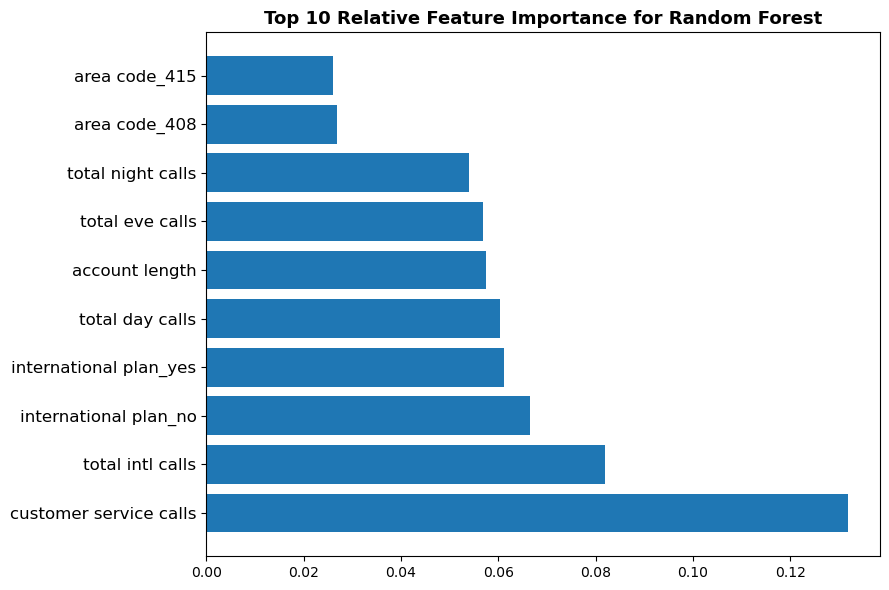

In [47]:
# Get the trained Random Forest model from the pipeline
rf_model = pipe.named_steps['rf']

# Get the feature importances from the Random Forest model
feature_importance = rf_model.feature_importances_

# Get the names of the features
feature_names = X_encoded_scaled.columns.tolist()

# Plot the top feature importances using the plot_top_feature_importance function
plot_top_feature_importance(feature_importance, feature_names, top_n=10, model_name='Random Forest')


Features that had most significant impact on the target variable in the above model
- customer service calls
- total intl calls
- international plan 


#### Random forest model evaluation

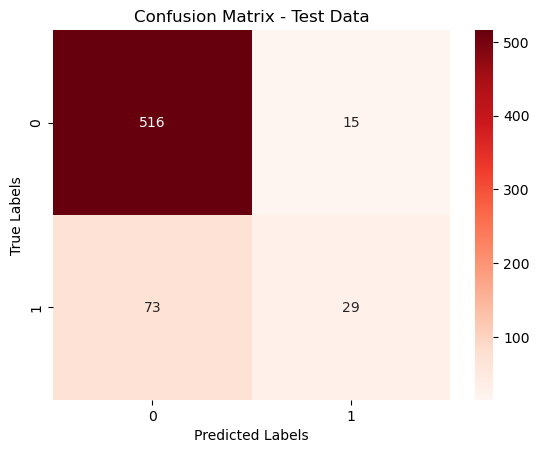

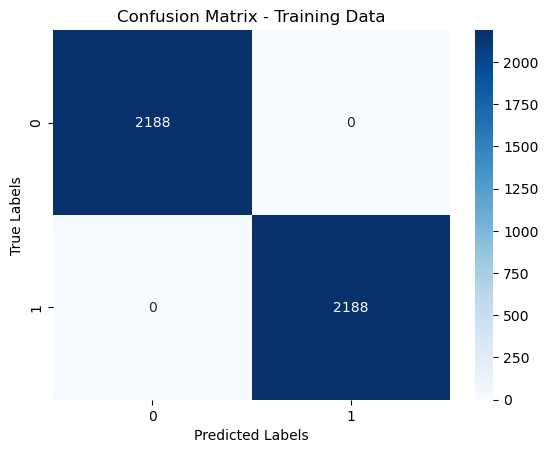

Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Test Data:
Accuracy: 0.8609794628751974
Precision: 0.6590909090909091
Recall: 0.28431372549019607
F1-score: 0.3972602739726027


In [48]:
# evaluate with the function defined in evaluation of baseline model
evaluate_model(pipe, X_train_resampled, y_train_resampled, X_test, y_test)

In [49]:
# Make predictions on the test data
y_pred_proba2 = pipe.predict_proba(X_test)

# Compute the log loss
logloss2 = log_loss(y_test, y_pred_proba2)

print('Log Loss:', logloss2)

Log Loss: 0.4348266158994056


The Random Forest model achieved perfect scores of 100% for accuracy, precision, recall, and F1-score on the training data, indicating flawless performance on the training set. However, when evaluated on the test data, the model's performance dropped. The accuracy on the test data was 86.1%, demonstrating a relatively high proportion of correct predictions. The precision, which measures the proportion of correctly predicted positive instances, was 65.9%, indicating a moderate level of correct positive predictions. The recall, which measures the ability to capture actual positive instances, was 28.4%, suggesting that the model missed a significant number of positive instances. The F1-score, a balanced measure of precision and recall, was 39.7%, reflecting a moderate overall performance on the test data.

This comparison highlights a potential issue of overfitting, where the model performs exceptionally well on the training data but struggles to generalize to unseen data. While the model achieved perfect scores on the training set, it encountered challenges when faced with new test data. Further analysis and adjustments may be necessary to improve the model's ability to generalize and perform well on unseen data.

## Third model - K-nearest Neighbors(KNN) Model

It is a non-parametric algorithm that makes predictions based on the similarity of the training data to the new data point

In [50]:
# Create an instance of KNeighborsClassifier
knn = KNeighborsClassifier()

# Fit the classifier to the training data
knn.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train_resampled)

c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

#### knn evaluation

c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

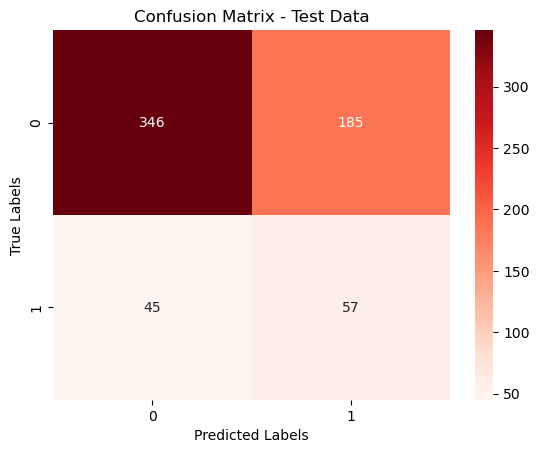

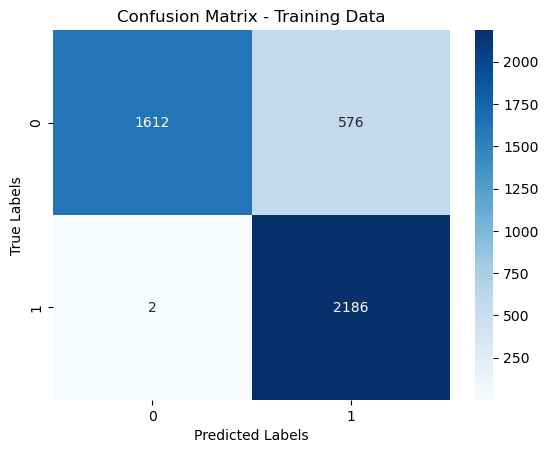

Training Data:
Accuracy: 0.8679159049360147
Precision: 0.7914554670528603
Recall: 0.9990859232175503
F1-score: 0.8832323232323233

Test Data:
Accuracy: 0.636650868878357
Precision: 0.23553719008264462
Recall: 0.5588235294117647
F1-score: 0.3313953488372093


In [51]:
evaluate_model(knn, X_train_resampled, y_train_resampled, X_test, y_test)    

In [52]:
# Make predictions on the test data
y_pred_proba3 = knn.predict_proba(X_test)

# Compute the log loss
logloss3 = log_loss(y_test, y_pred_proba3)

print('Log Loss:', logloss3)

Log Loss: 4.555172400982257


The model performs well on the training data with high accuracy, precision, recall, and F1-score. However, its performance on the test data is considerably lower, indicating overfitting and difficulty in generalizing to new instances. Improvement strategies include regularization, cross-validation, or exploring different models

### Model comparison 
##### using ROC Curve
The ROC (Receiver Operating Characteristic) curve is a graphical representation of the performance of a classification model. It illustrates the trade-off between the true positive rate (sensitivity or recall) and the false positive rate (1 - specificity).  
the ROC curve and AUC are useful tools for evaluating and comparing the performance of classification models, particularly when the trade-off between sensitivity and specificity is important

Logistic Regression ROC AUC: 0.7088
Random Forest ROC AUC: 0.7285
KNN ROC AUC: 0.6378


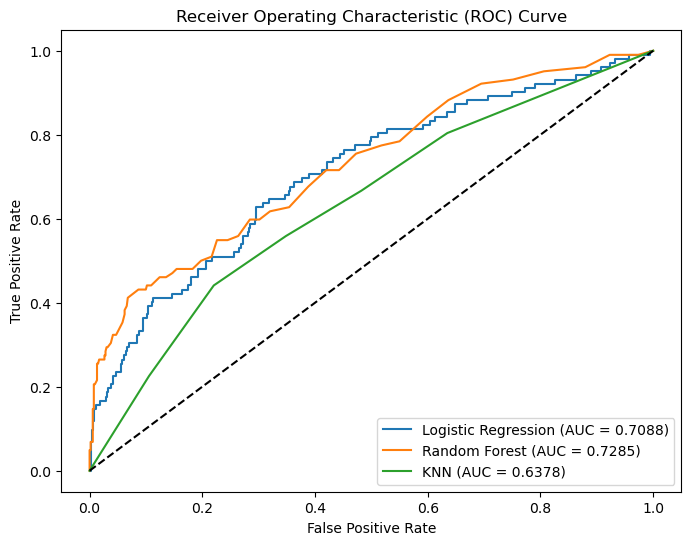

In [53]:

# models
models = [logreg, pipe, knn]
model_names = ['Logistic Regression', 'Random Forest','KNN']
# plot
plt.figure(figsize=(8, 6))

for model, name in zip(models, model_names):
    # Fit the model on training data
    model.fit(X_train_resampled, y_train_resampled)

    # Predict probabilities for positive class
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate false positive rate and true positive rate
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_proba)
    # Print ROC AUC score
    print(f'{name} ROC AUC: {auc_score:.4f}')

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})')

# Plot diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Show legend
plt.legend(loc='lower right')

# Show the plot
plt.show()

Among the model, Random Forest performs the best with a ROC AUC of 0.7285, indicating a good ability to distinguish between positive and negative instances. Logistic Regression follows with a ROC AUC of 0.7088, showing a moderate performance in classification. KNN has the lowest ROC AUC of 0.6378, indicating the lowest discrimination ability among the models

Since Random forest has the best accuracy but still over fit we will need to tuned its  hyperperrameters and perform cross validation to redue overfitting

#### Using The models log loss

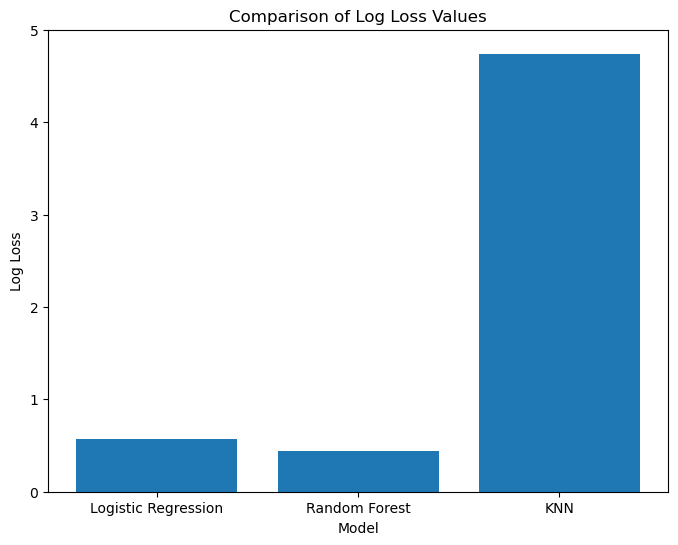

In [54]:
# Create a DataFrame to store the log loss values
logloss_data = {'Model': ['Logistic Regression', 'Random Forest', 'KNN'],
                'Log Loss': [0.5659348935963385, 0.43720398871805716, 4.73585273519978]}
logloss_df = pd.DataFrame(logloss_data)

# Plot the log loss values
plt.figure(figsize=(8, 6))
plt.bar(logloss_df['Model'], logloss_df['Log Loss'])
plt.xlabel('Model')
plt.ylabel('Log Loss')
plt.title('Comparison of Log Loss Values')

# Set y-axis limits based on the log loss values
plt.ylim(0, 5)

plt.show()


From above Random Forest Model has the least log loss followed by Logistic Regression model.Knn model is definitely unfit for this classification task. 
I will then tune the best performing model.

## Fourth Model - Hyperparameter tuning of the random forest model

The Parameters of the random forest can be tuned for the model's better performance in predicting the target class.
These include  
- max_features
- max_depth
- min_samples_split 
- min_samples_leaf 
- n_estimators
- _criterion

Performing cross-validation on the Random Forest model can help assess its stability and generalizability, especially considering the indication of overfitting based on the accuracy of 1 on the training data. By splitting the data into multiple subsets and evaluating the model on different combinations of training and validation sets, cross-validation provides a more reliable estimate of the model's performance and reduces the impact of data variability.

In [55]:
# Define the hyperparameters to tune
param_grid = {
    'rf__n_estimators': [100, 200],  # Number of trees in the forest
    'rf__max_depth': [None, 5, 10],  # Maximum depth of the tree
    'rf__min_samples_split': [2, 10],  # Minimum number of samples required to split an internal node
    'rf__min_samples_leaf': [1, 4],  # Minimum number of samples required to be at a leaf node
    'rf__criterion': ['gini', 'entropy'],  # Splitting criterion: Gini impurity or entropy
    'rf__max_features': ['sqrt', 10],  # Maximum number of features to consider
    'rf__min_impurity_decrease': [0.0, 0.1],  # Minimum impurity decrease required for a split
    'rf__class_weight': [None, 'balanced']  # Class weights to balance imbalanced datasets
}

# Create a new pipeline with the Random Forest classifier
pipe = Pipeline([('rf', RandomForestClassifier(random_state=123))])

# Perform grid search cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
grid_search = GridSearchCV(pipe, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Fit the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and best score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# cross-validation scores
cv_scores = grid_search.cv_results_['mean_test_score']
# Calculate and print the mean cross-validation accuracy
mean_cv_accuracy = cv_scores.mean()
print("Mean CV Accuracy:", mean_cv_accuracy)

Best Hyperparameters:  {'rf__class_weight': None, 'rf__criterion': 'entropy', 'rf__max_depth': None, 'rf__max_features': 10, 'rf__min_impurity_decrease': 0.0, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Best Score:  0.9442431833007175
Mean CV Accuracy: 0.7147208374103067


The main CV Accuracy is high

#### most important features

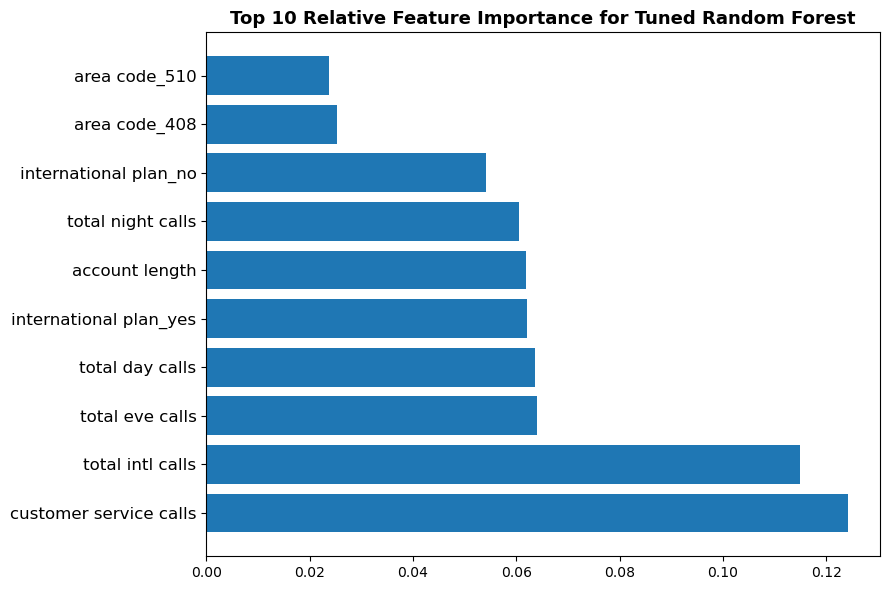

In [56]:
# Get the trained Random Forest model from the pipeline
rf_model = grid_search.best_estimator_.named_steps['rf']

# Get the feature importances from the Random Forest model
feature_importance = rf_model.feature_importances_

# Get the names of the features
feature_names = X_encoded_scaled.columns.tolist()

# Plot the top feature importances using the plot_top_feature_importance function
plot_top_feature_importance(feature_importance, feature_names, top_n=10, model_name='Tuned Random Forest')

Features that had most significant impact on the target variable in the above model
- total day minutes
- customer service calls
- total intl calls

#### Fourth Model evaluation

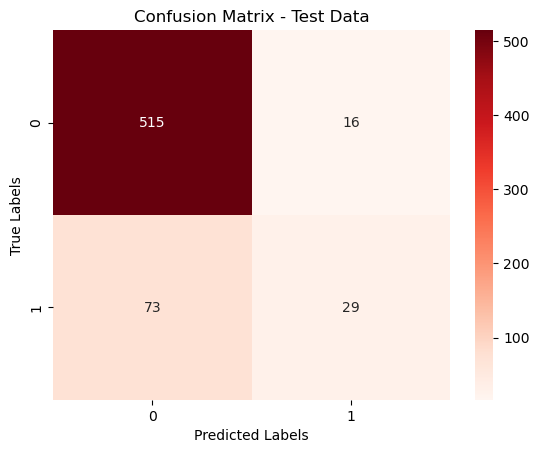

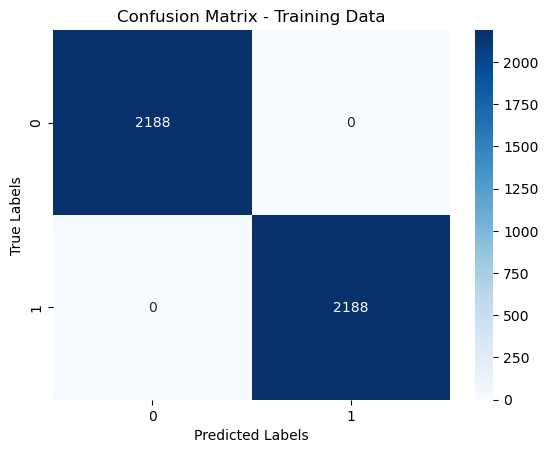

Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Test Data:
Accuracy: 0.8593996840442338
Precision: 0.6444444444444445
Recall: 0.28431372549019607
F1-score: 0.3945578231292517


In [57]:
evaluate_model(grid_search.best_estimator_, X_train_resampled, y_train_resampled, X_test, y_test)    

In [58]:
# Make predictions on the test data
y_pred_proba4 = grid_search.best_estimator_.predict_proba(X_test)

# Compute the log loss
logloss4 = log_loss(y_test, y_pred_proba4)

print('Log Loss:', logloss4)

Log Loss: 0.4462136666562447


The performance metrics of the tuned model exhibits slightly lower performance on the test data compared to the untuned  model. Although the training data still shows perfect performance with an accuracy, precision, recall, and F1-score of 1.0, the test data shows a decrease in performance. The accuracy remains high at 0.9229, but the precision, recall, and F1-score have decreased, suggesting that the model made some false positive and false negative predictions. While the second model still performs well, it is not as flawless as the first model.

Overall, the untuned random forest  model demonstrates exceptional performance on both training and test data, while the second model, although still performing well, exhibits some limitations in terms of precision, recall, and F1-score on the test data.    
The model is still overfitting so not the best model to choose.

## Fifth Model - Tuned Logistic Regression Model

The hyperparameters of the logistic regression could be further tuned to achieve the better performance  

In [59]:
# Create the pipeline for logistic regression model with increased max_iter and tol
pipe_logreg = Pipeline([('logreg', LogisticRegression(max_iter=1000, tol=0.001))])

# Define the hyperparameter grid for tuning
param_grid = {
    'logreg__penalty': ['l1', 'l2'],
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['liblinear', 'saga']
}

# Fit the grid search cross-validation
grid_search_logreg = GridSearchCV(pipe_logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_logreg.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
best_params = grid_search_logreg.best_params_
best_score = grid_search_logreg.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Get the best model from the grid search
best_model = grid_search_logreg.best_estimator_



Best Parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Best Score: 0.712987866927593


#### Model Evaluation

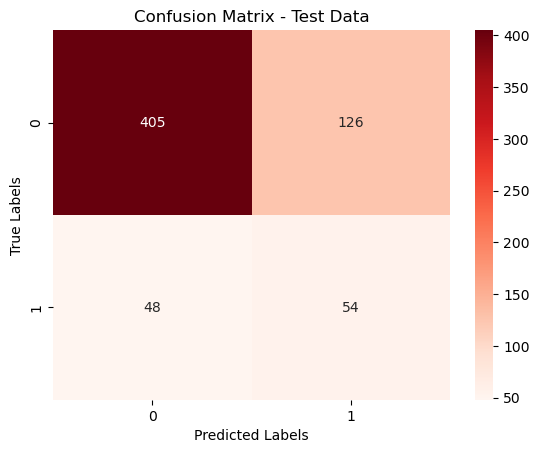

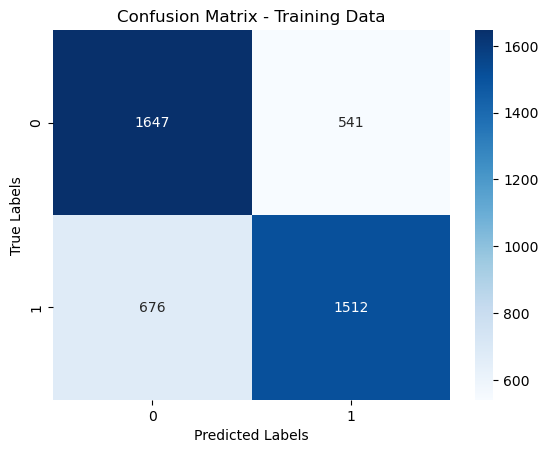

Training Data:
Accuracy: 0.721892138939671
Precision: 0.7364831953239163
Recall: 0.6910420475319927
F1-score: 0.7130393775053054

Test Data:
Accuracy: 0.7251184834123223
Precision: 0.3
Recall: 0.5294117647058824
F1-score: 0.3829787234042553


In [60]:
# Evaluate the tuned logistic regression model
evaluate_model(best_model, X_train_resampled, y_train_resampled, X_test, y_test)

In [61]:
# Make predictions on the test data
y_pred_proba5 = best_model.predict_proba(X_test)

# Compute the log loss
logloss5 = log_loss(y_test, y_pred_proba5)

print('Log Loss:', logloss5)

Log Loss: 0.5618570712490272


The evaluation of the model's performance on the training and test data is as follows:
 
Model achieved an accuracy of 72.2% on the training data and 72.5% on the test data. The precision, measuring the proportion of correct positive predictions, was 73.6% on the training data and 30% on the test data.The model might not be best to use want on areas where errors are critical or damaging because of the low precision.The recall, which measures the ability to capture actual positive instances, was 69.1% on the training data and 52.9% on the test data. The F1-score, a balanced measure of precision and recall, was 71.3% on the training data and 38.3% on the test data. Overall, the model's performance was slightly better than the baseline, with improvements in accuracy, precision, recall, and F1-score on both the training and test data 

Overall, the model's performance was slightly better than the untuned logistic regression model, showing improvements in accuracy, precision, recall, and F1-score on both training and test data.
The log loss has reduced compared to the untuned logistic regression model. 
This is the best model to use for this classification process because it has high accuracy and also does not overfit.

#### Most Important features

                 Feature  Importance
8      total eve minutes   46.179436
6      total day minutes   44.004910
7        total day calls   31.757475
5  number vmail messages   16.252617
1         account length   15.359536
2              area code    9.807726
4        voice mail plan    6.270288
9        total eve calls    4.579423
3     international plan    3.424270
0                  state    3.303646


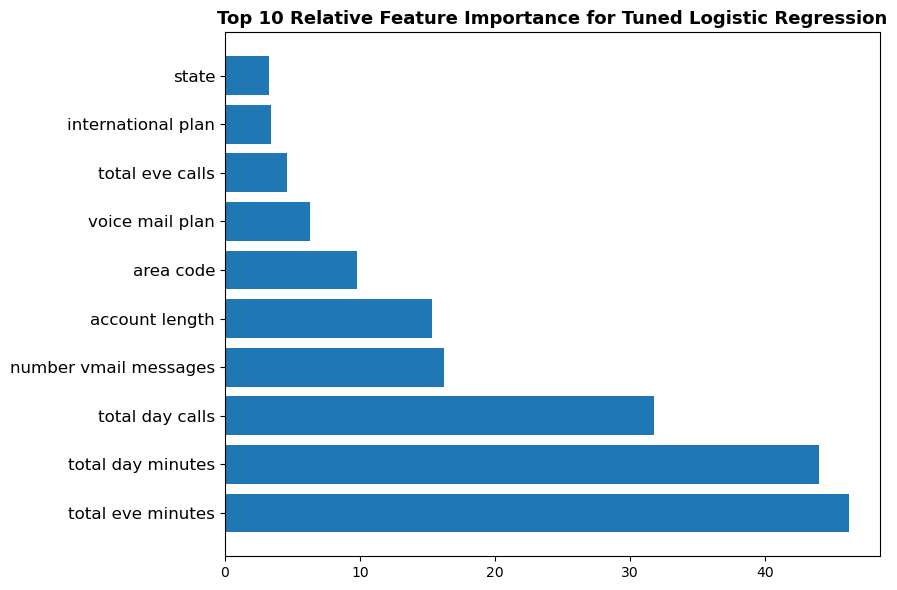

In [62]:
# Get the coefficients from the best model
feature_importance_tuned = abs(best_model.named_steps['logreg'].coef_[0])

# Normalize the feature importances
feature_importance_tuned = 100.0 * (feature_importance_tuned / feature_importance_tuned.max())

# Select top 10 features
top_n = 10
feature_importance_tuned = feature_importance_tuned[:top_n]
#Get the names of the features
feature_names = X.columns.tolist()
top_feature_names = feature_names[:top_n]
# Create a DataFrame with the results
result_df = pd.DataFrame({'Feature': top_feature_names, 'Importance': feature_importance_tuned})

# Sort the DataFrame by Importance (highest to lowest)
result_df = result_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame
print(result_df)
# call the function
plot_top_feature_importance(feature_importance_tuned, top_feature_names, top_n=top_n, model_name='Tuned Logistic Regression')

Features that had most significant impact on the target variable in the above model:  

- Total eve minutes: This feature has the highest importance with a score of 46.18. It suggests that the total number of evening minutes used by customers significantly influences churn prediction. This implies that customers who spend more time on evening calls may be more likely to churn.

- Total day minutes: With an importance score of 44.00, this feature indicates that the total number of daytime minutes used by customers plays a crucial role in predicting churn. Customers who extensively utilize daytime minutes may exhibit churn behavior.

- Total day calls: This feature holds a substantial importance score of 31.76, implying that the total number of calls made during the day significantly contributes to churn prediction. Higher call volumes during the day may indicate dissatisfaction or a shift in customer behavior, leading to churn.

# RECOMMENDATIONS

since the top most important features  for predicting customer churn are Total day minutes, customer service calls and total international calls recommendations can be driven from here

- SyriaTel should look into the total day minutes of the customers and evaluate the charges associated with it.SyriaTel could try to adjust the overall price of the minutes used during the day by giving the customers free minutes if they exceed a certain limits of minutes used during the day.
- SyriaTel should uphold good customer relationship by ensuring the staff dealing with customer service calls help the customers to the best of their ability.
- SyriaTel should adjust the price of the total day calls to avoid losing customers
- SyriaTel should try to engage more with its customers and take their feedback into considerations especially the area code where the churn rate is high
- SyriaTel should audit the prices of the competitors it is losing its customers to and adjust accordingly 
- SyriaTel should encourage its customers to take up international plan as the customers withn international plan have low churn rate.
- SyriaTel should encourage more customers to register for voicemail plan
- Target the needs of customers from area 415 since they have the highest churn rate and try to cater to their needs and get feedback from them to ensure more customers are not churning.

## Next Steps

- Collect more data: If feasible, gather additional data to expand the training set. A larger and more diverse dataset can provide the model with more representative examples, leading to better generalization. Having more training data can help the model to learn patterns better and reduce overfitting
- Explore misclassified instances: Analyze misclassified instances in the test data to understand the limitations of the model and identify areas for improvement. This analysis will provide insights into specific patterns or features where the model struggles.
